/superfast2TB/home2/thompsong/Developer/KSCRocketSeismoHydrology/Python/new_workflow
FL.BCHH.00.GHN FL.BCHH.00.GHN
FL.BCHH.00.GHN | 2016-03-04T23:00:00.000000Z - 2016-03-05T00:00:00.999500Z | 2000.0 Hz, 7202000 samples
FL.BCHH.00.GHN FL.BCHH.00.GHN
FL.BCHH.00.GHN | 2016-03-04T00:00:00.000000Z - 2016-03-05T00:00:00.999500Z | 2000.0 Hz, 172802000 samples
Downsampling traces FL.BCHH.00.GHN FL.BCHH.00.GHN 



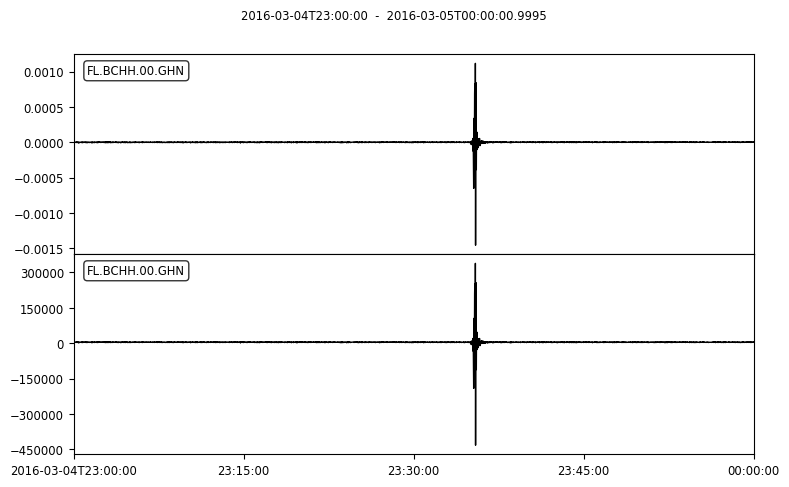

Merge


/home/thompsong/miniconda3new/envs/passoft3/lib/python3.10/site-packages/obspy/core/stream.py:3042: UserWarning: Incompatible traces (sampling_rate, dtype, ...) with same id detected. Doing nothing.
  warnings.warn(msg)


Exception: Can't merge traces with same ids but differing data types!

In [4]:
import obspy
import sys
import os
print(os.getcwd())
sys.path.append('Python/new_workflow')
import fix_SDS_archive as FSA
#st1 = obspy.read('/data/KSC/eventminiseedfiles/FL.BCHH1.00.HHN.D.2018.031')
#st2 = obspy.read('/data/SDS/2018/FL/BCHH1/DHN.D/FL.BCHH1.00.DHN.D.2018.031')
st1 = obspy.read('/data/KSC/eventminiseedfiles/FL.BCHH.00.GHN.D.2016.064')
st2 = obspy.read('/data/SDS/2016/FL/BCHH/GHN.D/FL.BCHH.00.GHN.D.2016.064')
#print(st1, st2)
for tr in st1 + st2:
    FSA.fix_trace_id(tr)

# Downsample to 1 Hz if necessary
stcopy = (st1 + st2).copy()
target_sampling_rate = 1.0
print(f'Downsampling traces', end=' ')
maxstime = max([tr.stats.starttime for tr in stcopy])
minetime = min([tr.stats.endtime for tr in stcopy])
for trace in stcopy:
    print(trace.id, end=' ')
    if trace.stats.sampling_rate > target_sampling_rate:
        decimation_factor = int(trace.stats.sampling_rate / target_sampling_rate)
        if decimation_factor > 1:
            trace.decimate(decimation_factor, no_filter=True)
print('\n')  

stcopy.plot(automerge=False, equal_scale=False, starttime=maxstime, endtime=minetime);

print('Merge')
st3 = (st1 + st2).merge()
print(st3)
